In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from catboost import CatBoostClassifier

In [ ]:
df = pd.read_csv("/content/application_train.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (9692, 122)

First 5 Rows:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_2

In [ ]:
df.head(10)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
7,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
if "SK_ID_CURR" in df.columns:
    df = df.drop(columns=["SK_ID_CURR"])

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":  # categorical
        df[col] = df[col].fillna("Unknown")
    else:  # numerical
        df[col] = df[col].fillna(df[col].median())

# Target column
target = "TARGET"
y = df[target]
X = df.drop(columns=[target])

In [ ]:
# Encode categorical variables
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Label encode categorical columns for Logistic Regression
X_encoded = X.copy()
for col in categorical_features:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Train-Test Split

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_val_proba = log_model.predict_proba(X_val)[:, 1]
log_auc = roc_auc_score(y_val, log_val_proba)
print(f"[Logistic Regression] Validation ROC-AUC: {log_auc:.4f}")

[Logistic Regression] Validation ROC-AUC: 0.6052


In [ ]:
# CatBoost can directly handle categorical features
X_train_cb, X_val_cb, y_train_cb, y_val_cb = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

cb_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=0,
    random_seed=42
)

cb_model.fit(
    X_train_cb, y_train_cb,
    cat_features=categorical_features,
    eval_set=(X_val_cb, y_val_cb),
    verbose=100
)

cb_val_proba = cb_model.predict_proba(X_val_cb)[:, 1]
cb_auc = roc_auc_score(y_val_cb, cb_val_proba)
print(f"[CatBoost] Validation ROC-AUC: {cb_auc:.4f}")

0:	test: 0.5609657	best: 0.5609657 (0)	total: 93.3ms	remaining: 46.6s
100:	test: 0.7332215	best: 0.7339437 (97)	total: 3.94s	remaining: 15.6s
200:	test: 0.7266767	best: 0.7339437 (97)	total: 7.88s	remaining: 11.7s
300:	test: 0.7265286	best: 0.7339437 (97)	total: 13.1s	remaining: 8.68s
400:	test: 0.7275842	best: 0.7339437 (97)	total: 18.5s	remaining: 4.58s
499:	test: 0.7231470	best: 0.7339437 (97)	total: 23s	remaining: 0us

bestTest = 0.7339437308
bestIteration = 97

Shrink model to first 98 iterations.
[CatBoost] Validation ROC-AUC: 0.7339


In [ ]:
COST_FALSE_POSITIVE = 100  # cost of wrongly predicting default
COST_FALSE_NEGATIVE = 500  # cost of missing a true default

def optimal_threshold(y_true, y_proba, cost_fp, cost_fn):
    thresholds = np.linspace(0, 1, 200)
    best_threshold, best_cost = 0.5, float("inf")
    costs = []

    for t in thresholds:
        preds = (y_proba >= t).astype(int)
        fp = np.sum((preds == 1) & (y_true == 0))
        fn = np.sum((preds == 0) & (y_true == 1))
        total_cost = fp * cost_fp + fn * cost_fn
        costs.append(total_cost)

        if total_cost < best_cost:
            best_cost = total_cost
            best_threshold = t

    return best_threshold, best_cost, thresholds, costs

In [ ]:
# Logistic Regression optimal threshold
log_th, log_cost, log_ths, log_costs = optimal_threshold(
    y_val, log_val_proba, COST_FALSE_POSITIVE, COST_FALSE_NEGATIVE
)

# CatBoost optimal threshold
cb_th, cb_cost, cb_ths, cb_costs = optimal_threshold(
    y_val_cb, cb_val_proba, COST_FALSE_POSITIVE, COST_FALSE_NEGATIVE
)

print(f"\n[Logistic] Best Threshold={log_th:.3f}, Cost={log_cost}")
print(f"[CatBoost] Best Threshold={cb_th:.3f}, Cost={cb_cost}")


[Logistic] Best Threshold=0.281, Cost=75000
[CatBoost] Best Threshold=0.131, Cost=63600


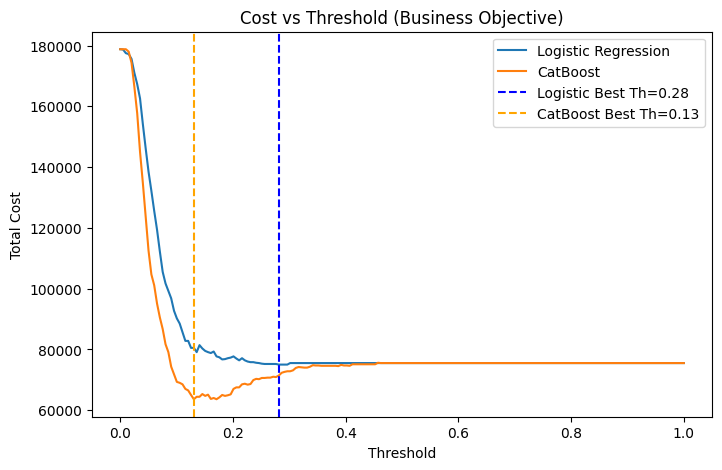

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(log_ths, log_costs, label="Logistic Regression")
plt.plot(cb_ths, cb_costs, label="CatBoost")
plt.axvline(log_th, color="blue", linestyle="--", label=f"Logistic Best Th={log_th:.2f}")
plt.axvline(cb_th, color="orange", linestyle="--", label=f"CatBoost Best Th={cb_th:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Total Cost")
plt.title("Cost vs Threshold (Business Objective)")
plt.legend()
plt.show()


In [ ]:
%pip install catboost -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00
